In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import ks_2samp
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder, PolynomialFeatures


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_curve,
    roc_auc_score, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
)

from joblib import dump


In [37]:
data = pd.read_excel('./data.xlsx', sheet_name="final data")

In [38]:
data.head()

,Date,Campaign type,Campaign name,Ad set name,Ad name,Model,On-Facebook leads,Cost,Clicks (all),Link clicks,...,calc_efic_CPE,calc_porc_cumplimiento_reach,calc_CPA_reach,calc_efic_CPA_reach,calc_CPMA,calc_efic_CPMA,calc_conversion_rate,calc_CPL_adname,calc_CPE_adname,calc_CTR
0,2024-09-11,BRANDING,Branding_HMC_Branding_Evento_Zona_PCX160_Septi...,Branding_HMC_Branding_Evento_Zona_PCX160_Septi...,Branding_HMC_Branding_Evento_Medellin_Retoma_j...,0,0,16073,21,3,...,-67.158701,0.0,1.331435,-1.331435,1331.434684,-1331.434684,0.0,0.0,1461.181818,0.014021
1,2024-09-12,BRANDING,Branding_HMC_Branding_Evento_Zona_PCX160_Septi...,Branding_HMC_Branding_Evento_Zona_PCX160_Septi...,Branding_HMC_Branding_Evento_Medellin_Retoma_j...,0,0,35436,40,10,...,-69.680181,0.0,1.359833,-1.359833,1359.833464,-1359.833464,0.0,0.0,1716.966667,0.013906
2,2024-09-13,BRANDING,Branding_HMC_Branding_Evento_Zona_PCX160_Septi...,Branding_HMC_Branding_Evento_Zona_PCX160_Septi...,Branding_HMC_Branding_Evento_Medellin_Retoma_j...,0,0,27387,43,7,...,-72.010309,0.0,1.383175,-1.383175,1383.174858,-1383.174858,0.0,0.0,1488.603774,0.013832
3,2024-09-14,BRANDING,Branding_HMC_Branding_Evento_Zona_PCX160_Septi...,Branding_HMC_Branding_Evento_Zona_PCX160_Septi...,Branding_HMC_Branding_Evento_Medellin_Retoma_j...,0,0,20557,26,6,...,-74.116773,0.0,1.399847,-1.399847,1399.847161,-1399.847161,0.0,0.0,1441.347826,0.013724
4,2024-09-15,BRANDING,Branding_HMC_Branding_Evento_Zona_PCX160_Septi...,Branding_HMC_Branding_Evento_Zona_PCX160_Septi...,Branding_HMC_Branding_Evento_Medellin_Retoma_j...,0,0,28965,38,5,...,-75.958937,0.0,1.403605,-1.403605,1403.604992,-1403.604992,0.0,0.0,1510.800000,0.013510


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 74 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 2771 non-null   object 
 1   Campaign type                        2771 non-null   object 
 2   Campaign name                        2771 non-null   object 
 3   Ad set name                          2771 non-null   object 
 4   Ad name                              2771 non-null   object 
 5   Model                                2771 non-null   int64  
 6   On-Facebook leads                    2771 non-null   int64  
 7   Cost                                 2771 non-null   int64  
 8   Clicks (all)                         2771 non-null   int64  
 9   Link clicks                          2771 non-null   int64  
 10  Impressions                          2771 non-null   int64  
 11  Reach                         

In [40]:
data.describe()

,Model,On-Facebook leads,Cost,Clicks (all),Link clicks,Impressions,Reach,Post engagements,Page likes,Messaging conversations started,...,calc_efic_CPE,calc_porc_cumplimiento_reach,calc_CPA_reach,calc_efic_CPA_reach,calc_CPMA,calc_efic_CPMA,calc_conversion_rate,calc_CPL_adname,calc_CPE_adname,calc_CTR
count,2771.0,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,...,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000
mean,0.0,3.664742,33763.278600,389.780946,252.973656,24364.569830,18889.512089,476.594731,1.077950,2.472032,...,-142.390449,0.012038,2.893836,9.599848,2893.836284,-2889.992907,0.034200,588.587864,212.836306,0.012885
std,0.0,9.555000,40189.360516,680.732301,471.695407,42658.130086,32002.399046,1043.634873,8.751012,6.671470,...,133.739034,0.453554,2.308508,84.791320,2308.508047,2312.722799,0.066580,1415.247319,278.807227,0.012862
min,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-566.715589,-22.629714,0.391465,-17.937209,391.464595,-17937.208636,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,8656.500000,60.000000,21.000000,2196.500000,1812.500000,39.000000,0.000000,0.000000,...,-143.380574,0.000000,1.372358,-3.885717,1372.358115,-3885.717015,0.000000,0.000000,59.069342,0.000000
50%,0.0,0.000000,16861.000000,123.000000,65.000000,7030.000000,5534.000000,92.000000,0.000000,0.000000,...,-99.840095,0.000000,1.937716,-1.937716,1937.715556,-1937.715556,0.000000,0.000000,103.985971,0.010457
75%,0.0,0.000000,46337.000000,454.000000,295.000000,32543.500000,26645.000000,404.500000,0.000000,0.000000,...,-67.739998,0.000000,3.885717,-1.372358,3885.717015,-1372.358115,0.000000,0.000000,280.231278,0.021261
max,0.0,80.000000,343524.000000,6153.000000,4364.000000,447912.000000,435254.000000,11466.000000,139.000000,40.000000,...,194.416185,1.583666,17.937209,633.608535,17937.208636,48.893646,0.218182,27359.000000,2735.900000,0.063404


In [41]:
(data['Inversion Planeada'] == 0).sum()

598

In [42]:
((data['Inversion Planeada'] == 0).sum()/2770)*100

21.5884476534296

In [43]:
data = data[data['calc_CPC'] != 0]
data = data[data['Inversion Planeada'] != 0]

In [44]:
data.head()

,Date,Campaign type,Campaign name,Ad set name,Ad name,Model,On-Facebook leads,Cost,Clicks (all),Link clicks,...,calc_efic_CPE,calc_porc_cumplimiento_reach,calc_CPA_reach,calc_efic_CPA_reach,calc_CPMA,calc_efic_CPMA,calc_conversion_rate,calc_CPL_adname,calc_CPE_adname,calc_CTR
5,2024-09-16,BRANDING,Branding_HMC_Branding_Evento_CB100_Pauta-Organ...,Branding_HMC_Branding_Evento_Pauta-Organico_Se...,Branding_HMC_Branding_Evento_Pauta-Organico_Se...,0,0,19301,161,0,...,-22.058286,0.017274,0.661106,-0.661106,661.106354,48.893646,0.0,0.0,22.058286,0.005458
6,2024-09-17,BRANDING,Branding_HMC_Branding_Evento_CB100_Pauta-Organ...,Branding_HMC_Branding_Evento_Pauta-Organico_Se...,Branding_HMC_Branding_Evento_Pauta-Organico_Se...,0,0,39302,312,0,...,-21.883122,0.050619,0.684991,-0.684991,684.990591,25.009409,0.0,0.0,21.883122,0.005456
7,2024-09-18,BRANDING,Branding_HMC_Branding_Evento_CB100_Pauta-Organ...,Branding_HMC_Branding_Evento_Pauta-Organico_Se...,Branding_HMC_Branding_Evento_Pauta-Organico_Se...,0,0,40402,354,1,...,-22.629714,-22.629714,0.704476,-0.704476,704.476401,5.523599,0.0,0.0,22.629714,0.005796
8,2024-09-19,BRANDING,Branding_HMC_Branding_Evento_CB100_Pauta-Organ...,Branding_HMC_Branding_Evento_Pauta-Organico_Se...,Branding_HMC_Branding_Evento_Pauta-Organico_Se...,0,0,40139,309,0,...,-23.010418,0.115184,0.714743,-0.714743,714.742882,-4.742882,0.0,0.0,23.010418,0.005740
9,2024-09-20,BRANDING,Branding_HMC_Branding_Evento_CB100_Pauta-Organ...,Branding_HMC_Branding_Evento_Pauta-Organico_Se...,Branding_HMC_Branding_Evento_Pauta-Organico_Se...,0,0,39135,322,0,...,-23.405409,0.145943,0.722761,-0.722761,722.760516,-12.760516,0.0,0.0,23.405409,0.005821


# **Variables de interés para el modelo luego de consultar con los expertos de negocio:**

In [45]:
data[ [
    'Inversion Planeada', 'Meta Leads', 'Meta Conversaciones',
    'Meta Clicks','Meta Seguidores', 'Meta interacciones', 'Meta Alcance' ]].describe()

,Inversion Planeada,Meta Leads,Meta Conversaciones,Meta Clicks,Meta Seguidores,Meta interacciones,Meta Alcance
count,2.173000e+03,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2.173000e+03
mean,2.017703e+06,251.246203,537.597791,10139.053382,28.893235,263.980212,3.964815e+04
std,1.380921e+06,458.779785,1270.758800,23009.182070,248.490344,1783.797496,2.177376e+05
min,1.100000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,9.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,1.600000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,3.373585e+06,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
max,4.788679e+06,1596.000000,3540.000000,101868.000000,2165.000000,15263.000000,1.690141e+06


In [46]:
relevant_columns = [
    'Inversion Planeada', 'Meta Leads', 'Meta Conversaciones',
    'Meta Clicks','Meta Seguidores', 'Meta interacciones', 'Meta Alcance','Campaign type']

In [47]:
data["Campaign type"].value_counts()

,count
Campaign type,
PERFORMANCE,933
BRANDING,691
TACTICOS,549


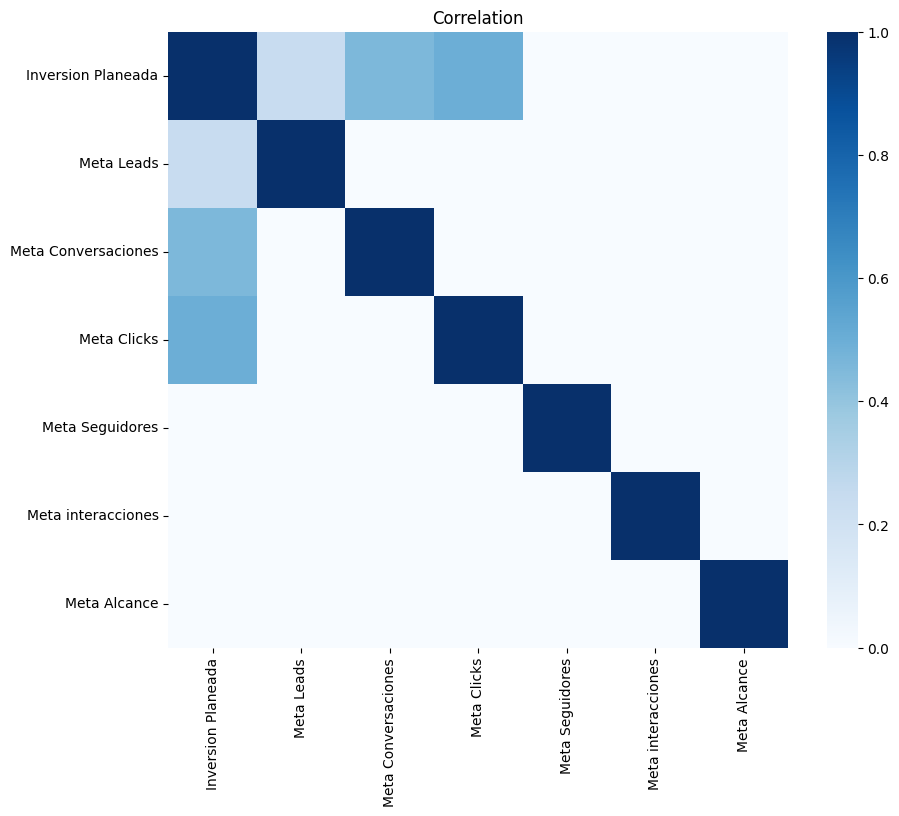

In [48]:
# Plotting correlation heatmap among review scores
plt.figure(figsize=(10, 8))
sns.heatmap(
    data[ [
    'Inversion Planeada', 'Meta Leads', 'Meta Conversaciones',
    'Meta Clicks','Meta Seguidores', 'Meta interacciones', 'Meta Alcance' ]].corr(),
    vmin=0, vmax=1,
    cmap="Blues"
)
plt.title("Correlation")
plt.show()

In [49]:
# Selección de variables relevantes

data_relevant = data[relevant_columns]

# Definir la variable objetivo (éxito de la campaña)
success_criteria = (data['calc_CPC'] < 80)
data_relevant['Success'] = np.where(success_criteria, 1, 0)

<ipython-input-49-1164216ccae4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant['Success'] = np.where(success_criteria, 1, 0)


In [50]:
data_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2173 entries, 5 to 2770
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Inversion Planeada   2173 non-null   int64 
 1   Meta Leads           2173 non-null   int64 
 2   Meta Conversaciones  2173 non-null   int64 
 3   Meta Clicks          2173 non-null   int64 
 4   Meta Seguidores      2173 non-null   int64 
 5   Meta interacciones   2173 non-null   int64 
 6   Meta Alcance         2173 non-null   int64 
 7   Campaign type        2173 non-null   object
 8   Success              2173 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 169.8+ KB


In [51]:
features = data_relevant.drop(['Success'], axis=1)
target = data_relevant['Success']


In [52]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=22)


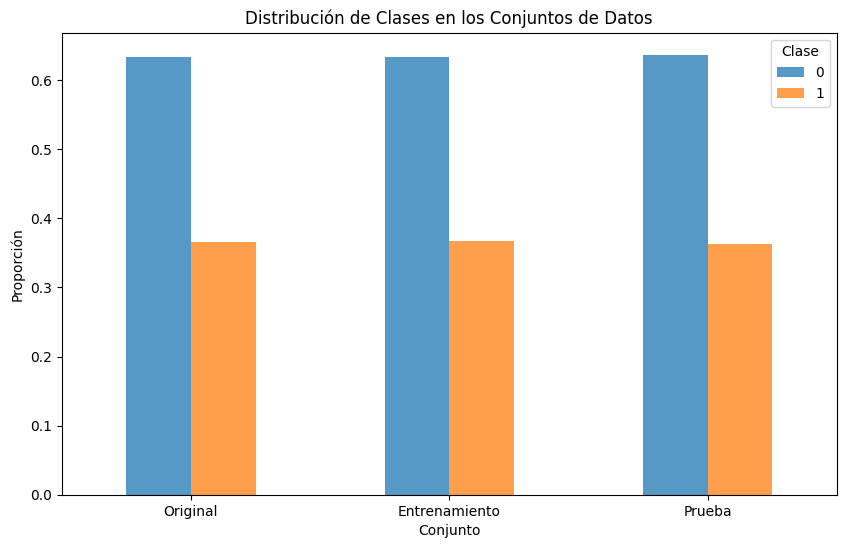

In [53]:
import matplotlib.pyplot as plt

# Calcular las proporciones de las clases
original_distribution = target.value_counts(normalize=True)
train_distribution = y_train.value_counts(normalize=True)
test_distribution = y_test.value_counts(normalize=True)

# Crear un DataFrame con las proporciones
distributions = pd.DataFrame({
    "Original": original_distribution,
    "Entrenamiento": train_distribution,
    "Prueba": test_distribution
}).T

# Graficar las distribuciones
distributions.plot(kind="bar", figsize=(10, 6), alpha=0.75)
plt.title("Distribución de Clases en los Conjuntos de Datos")
plt.xlabel("Conjunto")
plt.ylabel("Proporción")
plt.xticks(rotation=0)
plt.legend(title="Clase")
plt.show()


Arbol de decisión

In [54]:

pipeline_tree = Pipeline([
    ("transformer", ColumnTransformer([
        ("categorical", OneHotEncoder(), ["Campaign type"])
    ], remainder="passthrough")),
    ("classifier",  DecisionTreeClassifier())
])



# Entrenar el modelo
pipeline_tree.fit(X_train, y_train)

# Realizar predicciones
y_pred = pipeline_tree.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.896551724137931

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       277
           1       0.88      0.83      0.85       158

    accuracy                           0.90       435
   macro avg       0.89      0.88      0.89       435
weighted avg       0.90      0.90      0.90       435



Random forest

In [55]:
pipeline_random = Pipeline([
    ("transformer", ColumnTransformer([
        ("categorical", OneHotEncoder(), ["Campaign type"])
    ], remainder="passthrough")),
    ("classifier",  RandomForestClassifier(random_state=100, n_estimators=100))
])



# Entrenar el modelo
pipeline_random.fit(X_train, y_train)

# Realizar predicciones
y_pred = pipeline_random.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.896551724137931

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       277
           1       0.88      0.83      0.85       158

    accuracy                           0.90       435
   macro avg       0.89      0.88      0.89       435
weighted avg       0.90      0.90      0.90       435



Regresión logística

In [56]:
pipeline_rl = Pipeline([
    ("transformer", ColumnTransformer([
        ("categorical", OneHotEncoder(), ["Campaign type"])
    ], remainder="passthrough")),
    ("classifier",  LogisticRegression(random_state=22, max_iter=100))
])



# Entrenar el modelo
pipeline_rl.fit(X_train, y_train)

# Realizar predicciones
y_pred = pipeline_rl.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8735632183908046

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89       277
           1       0.74      0.99      0.85       158

    accuracy                           0.87       435
   macro avg       0.87      0.90      0.87       435
weighted avg       0.90      0.87      0.88       435



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM

In [57]:

# Crear el pipeline con transformaciones categóricas y numéricas
pipeline_svc = Pipeline([
    ("transformer", ColumnTransformer([
        ("categorical", OneHotEncoder(), ["Campaign type"]),
        ("numerical", StandardScaler(), ['Inversion Planeada', 'Meta Leads', 'Meta Conversaciones',
                                         'Meta Clicks', 'Meta Seguidores', 'Meta interacciones', 'Meta Alcance'])
    ], remainder="passthrough")),
    ("classifier", SVC())
])

# Entrenar el modelo
pipeline_svc.fit(X_train, y_train)

# Realizar predicciones
y_pred = pipeline_svc.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8850574712643678

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90       277
           1       0.76      0.99      0.86       158

    accuracy                           0.89       435
   macro avg       0.88      0.91      0.88       435
weighted avg       0.91      0.89      0.89       435



# **A/B testing**

In [58]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from scipy import stats
import numpy as np


models = [
    ("Logistic Regression", pipeline_rl),
    ("Random Forest", pipeline_random),
    ("Decision Tree", pipeline_tree)
]


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


def ab_testing(control_model, variant_model, X, y):
    acc_control = []
    acc_variant = []

    for train_index, test_index in skf.split(X, y):

        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]


        control_model.fit(X_train_cv, y_train_cv)
        y_pred_control = control_model.predict(X_test_cv)
        acc_control.append(accuracy_score(y_test_cv, y_pred_control))


        variant_model.fit(X_train_cv, y_train_cv)
        y_pred_variant = variant_model.predict(X_test_cv)
        acc_variant.append(accuracy_score(y_test_cv, y_pred_variant))


    t_stat, p_value = stats.ttest_rel(acc_control, acc_variant)

    return acc_control, acc_variant, t_stat, p_value


for name, variant_model in models:
    print(f"\nA/B Testing: pipeline_svc vs {name}")
    acc_control, acc_variant, t_stat, p_value = ab_testing(pipeline_svc, variant_model, X_train, y_train)

    # Resultados
    print(f"Accuracies (pipeline_svc): {acc_control}")
    print(f"Accuracies ({name}): {acc_variant}")
    print(f"T-statistic: {t_stat}, P-value: {p_value}")




A/B Testing: pipeline_svc vs Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracies (pipeline_svc): [0.9022988505747126, 0.9051724137931034, 0.8735632183908046, 0.8904899135446686, 0.9020172910662824]
Accuracies (Logistic Regression): [0.8879310344827587, 0.9051724137931034, 0.8620689655172413, 0.8645533141210374, 0.8847262247838616]
T-statistic: 3.277184795711051, P-value: 0.03058161595273047

A/B Testing: pipeline_svc vs Random Forest
Accuracies (pipeline_svc): [0.9022988505747126, 0.9051724137931034, 0.8735632183908046, 0.8904899135446686, 0.9020172910662824]
Accuracies (Random Forest): [0.9281609195402298, 0.9281609195402298, 0.882183908045977, 0.8760806916426513, 0.8904899135446686]
T-statistic: -0.7502797014227901, P-value: 0.4948084778809212

A/B Testing: pipeline_svc vs Decision Tree
Accuracies (pipeline_svc): [0.9022988505747126, 0.9051724137931034, 0.8735632183908046, 0.8904899135446686, 0.9020172910662824]
Accuracies (Decision Tree): [0.9281609195402298, 0.9281609195402298, 0.882183908045977, 0.8760806916426513, 0.8904899135446686]
T-statistic: -

Matriz de Confusión:
[[228  49]
 [  1 157]]


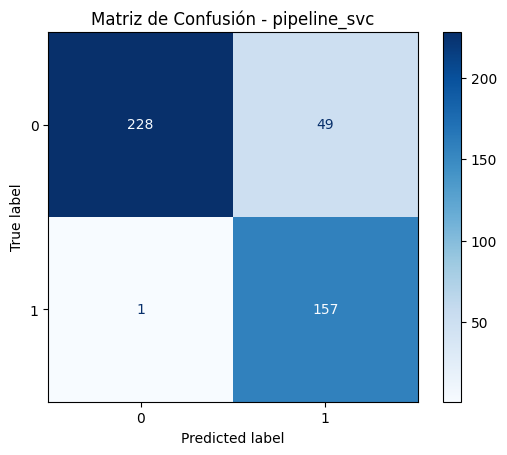


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       277
           1       0.76      0.99      0.86       158

    accuracy                           0.89       435
   macro avg       0.88      0.91      0.88       435
weighted avg       0.91      0.89      0.89       435



In [59]:


# Entrenar el pipeline
pipeline_svc.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = pipeline_svc.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(cm)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline_svc.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - pipeline_svc")
plt.show()

# Imprimir el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


In [60]:
import joblib

# Guardar el modelo entrenado
joblib.dump(pipeline_svc, 'modelo.pkl')



['modelo.pkl']